<a href="https://colab.research.google.com/github/icebearian/CS221-Natural-Language-Processing/blob/master/PosTaggingCapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Đề tài: **Gán nhãn từ loại cho tiếng Việt sử dụng Hidden Markov Model**
---

# **Dataset**
---
# *Dữ liệu thu thập và được tách từ gán nhãn thủ công*<br>
#*Nhãn được sử dụng theo từ điển của VLSP* ([VLSP Pos tag](https://vlsp.hpda.vn/demo/vcl/PoSTag.htm))

> Bao gồm **40** câu đã được gán nhãn từ loại:
- **35** câu dùng để train
- **5** câu dùng để làm dữ liệu **gold** cho quá trình tính toán độ chính xác.

# **Xử lý dữ liệu**: *Chuyển dữ liệu thành dạng tuple(word,list) cho mỗi câu*

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/data.csv")
def connect(index,df):
  dataset = []
  x = df["words"][index]
  y = df["pos"][index]
  y1 = x.split()
  y2 = y.split()
  z = len(y1)
  for i in range(z):
    dataset.append(tuple((y1[i],y2[i])))
  return dataset
DATA = []
for i in range(len(df)):
  DATA.append((connect(i,df)))

visualize = pd.DataFrame(DATA)
visualize.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"(Việt_Nam, Np)","(đang, R)","(có, V)","(102, M)","(ca, N)","(đang, R)","(điều_trị, V)","(Covid-19, N)",None,None,None,None,None,None,None,None,None,None,None,None
1,"(hiện_nay, N)","(nhiều, A)","(quốc_gia, N)","(trên, E)","(thế_giới, N)","(đã, R)","(ghi_nhận, V)","(nhiều, A)","(trường_hợp, N)","(nhiễm, V)","(biến_thể, N)","(virus_corona, Np)","(chủng_mới, R)","(ở, E)","(Anh, Np)",None,None,None,None,None
2,"(không, R)","(vì, E)","(ngại, V)","(cách_ly, V)","(mà, C)","(gây, V)","(họa, V)","(cho, E)","(cộng_đồng, N)",None,None,None,None,None,None,None,None,None,None,None
3,"(phó_thủ_tướng, N)","(cũng, R)","(yêu_cầu, V)","(các, D)","(bộ, N)","(ngành, N)",None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,"(phục_vụ, V)","(trực_tiếp, A)","(cho, E)","(hoạt_động, V)","(phòng_chống, V)","(dịch, N)",None,None,None,None,None,None,None,None,None,None,None,None,None,None


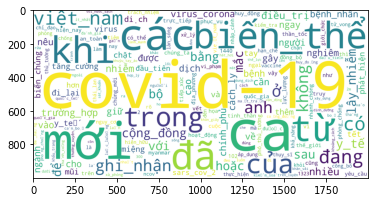

In [153]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud
background_color = "#FFFFFF"
height = 1000
width = 2000
words = []
def split_pos(df,words,index):
  x = df["words"][index]
  y = x.split()
  for i in range(len(y)):
    words.append(y[i])
  return words

for i in range(35):
  split_pos(df,words,i)

data = dict()
for word in words:
    word = word.lower()
    data[word] = data.get(word, 0) + 1

word_cloud = WordCloud(
    background_color=background_color,
    width=width,
    height=height
)

word_cloud.generate_from_frequencies(data)
word_cloud.to_file('image.png')
plt.imshow(mpimg.imread('image.png'))


In [154]:
train_data = DATA[:35]
gold_data = DATA[-5:]

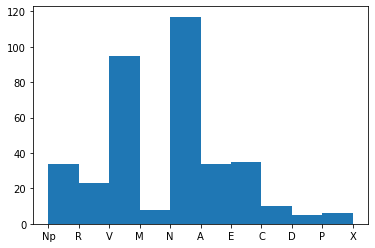

,ID,Define
0,Np,danh từ riêng
1,R,trợ động từ
2,V,động từ
3,M,số từ
4,N,danh từ
5,A,tính từ
6,E,giới từ
7,C,liên từ
8,D,định từ
9,P,đại từ


In [155]:
import matplotlib.pyplot as plt
word_count = []
def split_pos(df,word_count,index):
  x = df["pos"][index]
  y = x.split()
  for i in range(len(y)):
    word_count.append(y[i])
  return word_count

for i in range(35):
  split_pos(df,word_count,i)

plt.hist(word_count, bins=10)
plt.show()

name = [["Np","danh từ riêng"],["R","trợ động từ"],["V","động từ"],["M","số từ"],["N","danh từ"],["A","tính từ"],["E","giới từ"],["C","liên từ"],["D","định từ"],["P","đại từ"],["X","không xác định"]]
vis = pd.DataFrame(name,columns=["ID","Define"])
vis

# **GÁN NHÃN TỪ LOẠI (PART-OF-SPEECH Tagging)**
---



# **Học từ dữ liệu đã được gán nhãn**
---
Sử dụng mô hình **Hidden Markov Model** với phương pháp smoothing là **Laplace**.:


In [156]:
from nltk.tag.hmm import HiddenMarkovModelTrainer
from nltk.probability import LaplaceProbDist
trainer = HiddenMarkovModelTrainer()
tagger = trainer.train_supervised(train_data,estimator=LaplaceProbDist)

# **Thư viện VNCoreNLP**

In [157]:
! pip3 install vncorenlp
! wget 'https://github.com/vncorenlp/VnCoreNLP/archive/v1.1.1.zip' -O ./models.$$ && unzip -o ./models.$$ && rm -r ./models.$$

--2021-01-04 13:06:25--  https://github.com/vncorenlp/VnCoreNLP/archive/v1.1.1.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/vncorenlp/VnCoreNLP/zip/v1.1.1 [following]
--2021-01-04 13:06:25--  https://codeload.github.com/vncorenlp/VnCoreNLP/zip/v1.1.1
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘./models.2156’

./models.2156           [                <=> ] 137.29M  21.0MB/s    in 6.7s    

2021-01-04 13:06:32 (20.4 MB/s) - ‘./models.2156’ saved [143955573]

Archive:  ./models.2156
3b5c2aac53bb1fda0502d89ab8085b712e299fab
  inflating: VnCoreNLP-1.1.1/LICENSE.md  
  inflating: VnCoreNLP-1.1.1/Readme.md  
  inflating: 

# **Đánh giá**
---
Sử dụng độ chính xác **(Accuracy)** bằng công thức:<br>
$Acc = \frac{n}{N}$<br>
- $n$ là số lượng nhãn dự đoán đúng
- $N$ là tổng số lượng nhãn (tương ứng với số lượng
từ) trong ngữ liệu Gold.<br>

In [158]:
from vncorenlp import VnCoreNLP
annotator = VnCoreNLP('/content/VnCoreNLP-1.1.1/VnCoreNLP-1.1.1.jar', annotators="wseg,pos", max_heap_size='-Xmx2g')
INPUT = []
for i in range(35,40):
  INPUT.append((df["words"][i]))

def danh_gia(INPUT,index):
  sentence = INPUT.split()
  pos =tagger.tag(sentence)
  vnc = INPUT.replace("_"," ")
  count = 0
  for i in range(len(pos)):
    if pos[i][1] == gold_data[index][i][1]:
      count += 1
  print("_________________")
  print("Gold           :",gold_data[index])
  print("VnCoreNLP      :",annotator.pos_tag(vnc))
  print("Kết quả dự đoán:",pos)
  print("Accuracy       : {:0.2f}".format((count/len(pos))*100), "%")
  print("_________________")
for i in range(len(gold_data)):
  danh_gia(INPUT[i],i)

_________________
Gold           : [('Việt_Nam', 'Np'), ('đang', 'R'), ('thực_hiện', 'V'), ('tốt', 'A'), ('công_tác', 'N'), ('phòng_chống', 'V'), ('dịch', 'N')]
VnCoreNLP      : [[('Việt_Nam', 'Np'), ('đang', 'R'), ('thực_hiện', 'V'), ('tốt', 'A'), ('công_tác', 'N'), ('phòng_chống', 'V'), ('dịch', 'N')]]
Kết quả dự đoán: [('Việt_Nam', 'Np'), ('đang', 'R'), ('thực_hiện', 'V'), ('tốt', 'N'), ('công_tác', 'N'), ('phòng_chống', 'V'), ('dịch', 'N')]
Accuracy       : 85.71 %
_________________
_________________
Gold           : [('Bộ', 'N'), ('Y_tế', 'N'), ('đề_nghị', 'V'), ('dừng', 'V'), ('tổ_chức', 'V'), ('và', 'C'), ('hạn_chế', 'V'), ('chuyến', 'N'), ('bay', 'V'), ('từ', 'E'), ('quốc_gia', 'N'), ('có', 'V'), ('biến_thể', 'N'), ('virus_corona', 'N')]
VnCoreNLP      : [[('Bộ', 'N'), ('Y_tế', 'N'), ('đề_nghị', 'V'), ('dừng', 'V'), ('tổ_chức', 'V'), ('và', 'Cc'), ('hạn_chế', 'V'), ('chuyến', 'N'), ('bay', 'V'), ('từ', 'E'), ('quốc_gia', 'N'), ('có', 'V'), ('biến_thể', 'N'), ('virus', 'Nb'), ('